In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim

In [2]:
df = pd.read_json("../data/processed_data/processed.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
df

,paragraph,hour,day,month,year,filename,time
0,תם שימוע ראש הממשלה בינימין נתניהו לאחר עשר שע...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
1,גבר שלושים נורה ברחוב העלייה בלוד מצבו חובשי מ...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
2,הרמטכל רב אלוף אביב כוכבי מזהיר הערב נאפשר פגי...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
3,שר התחבורה בצלאל סמוטריץ הודיע בעמוד הפייסבוק ...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
4,נשיא ארצות הברית טראמפ הודיע יציב קווים אדומים...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
...,...,...,...,...,...,...,...
5141,בחירות אלפיים עשרים ואחת יושב ראש ימינה חבר הכ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5142,המחדל בנבטים במהלך אותרה הנקודה בגדר שממנה ככל...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5143,הדיונים פתיחת המסחר באמצעות הדרכון הירוק יימשכ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5144,פרסום ראשון חיילת פנתה לרמטכל בדרישה פתח התפקי...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00


In [3]:
df = df[df.paragraph != ""]

In [4]:
print(df.loc[0, "paragraph"])

תם שימוע ראש הממשלה בינימין נתניהו לאחר עשר שעות דיונים בתיק אלף תיק המתנות נחתמו ארבעת ימי השימוע כעת היועץ המשפטי לממשלה אביחי מנדלבליט להחליט להגיש אישום בארבעת התיקים יובל אראל מציין עורכי הדין יגישו סיכומים כתובים סוכות ומזכיר המשנה לפרקליט המדינה ליאת ארי נעדרה מן השימוע ביומיים האחרונים בשל חופשה משפחתית


# most common stopwords

In [5]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:60]:
        if (word not in stop):
            x.append(word)
            y.append(count)            
    sns.barplot(x=y,y=invert_words(x))
    return most

def invert_words(words):
    return [w[::-1] for w in words]

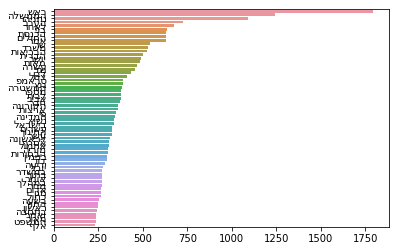

In [6]:
most_common = plot_top_non_stopwords_barchart(df.paragraph, [])

In [7]:
CUSTOM_STOPWORDS = []

In [8]:
CUSTOM_STOPWORDS

[]

In [9]:
def remove_stopwords(s, stopwords):
    word_list = s.split()
    output = [w for w in word_list if not w in stopwords]
    return " ".join(output)

df.loc[:, "paragraph"] = df.paragraph.apply(lambda x: remove_stopwords(x, CUSTOM_STOPWORDS))

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Tokenization

In [10]:
text_data = df.paragraph.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(text_data))

# Bigrams and Trigrams

In [11]:
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100)
bigram_mod = bigram.freeze()
trigram = gensim.models.Phrases(bigram[data_words], min_count=50, threshold=200)
trigram_mode = trigram.freeze()

In [12]:
from tqdm import tqdm
def make_bigrams(texts):
    return [bigram[doc] for doc in tqdm(texts)]

def make_trigrams(texts):
    return [trigram[bigram_mod[doc]] for doc in tqdm(texts)]

In [13]:
bigram_data_words = make_bigrams(data_words)

100%|██████████| 4660/4660 [00:00<00:00, 11711.29it/s]


In [14]:
trigram_data_words = make_trigrams(bigram_data_words)

100%|██████████| 4660/4660 [00:00<00:00, 8769.90it/s]


In [15]:
stop_grams = ["גלי_צהל", "בגלי_צהל"]

def remove_stopgrams(texts, stop_grams):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_grams] for doc in tqdm(texts)]

In [16]:
processed_data = remove_stopgrams(trigram_data_words, stop_grams)

100%|██████████| 4660/4660 [00:00<00:00, 14877.24it/s]


In [17]:
bigram.export_phrases()

{'היועץ_המשפטי': 503.55027932960894,
 'המשפטי_לממשלה': 524.4073914911904,
 'אביחי_מנדלבליט': 198.8283088235294,
 'יובל_אראל': 374.10971223021585,
 'מגן_דוד': 406.3004607833317,
 'דוד_אדום': 414.6192217781465,
 'אליאב_בטיטו': 695.6241558942697,
 'נשיא_ארצות': 157.15330780511653,
 'ארצות_הברית': 306.158702677747,
 'בארצות_הברית': 173.30913516609394,
 'אורן_פדידה': 345.91474780701753,
 'כחול_לבן': 335.6297626851973,
 'חבר_הכנסת': 188.1200410628839,
 'בני_גנץ': 102.53661242305178,
 'הפוליטי_מיכאל': 330.1666666666667,
 'מיכאל_האוזר': 645.7241887905604,
 'בתל_אביב': 276.7261530772526,
 'הממשלה_בנימין': 105.48558866634099,
 'בנימין_נתניהו': 129.51057149670137,
 'הרשימה_המשותפת': 157.00769342429962,
 'דורון_קדוש': 610.0897420935933,
 'עורך_הדין': 125.35313277704581,
 'בבאר_שבע': 234.65511684125707,
 'תל_אביב': 255.25961633175731,
 'אביגדור_ליברמן': 301.79296875,
 'בשבוע_שעבר': 140.01631067961165,
 'צוותי_מגן': 162.9081448227612,
 'לבית_החולים': 168.2758731833099,
 'צוות_מגן': 108.2430090924687

# Create dictionary and Corpus

In [18]:
import gensim.corpora as corpora

In [19]:
id2word = corpora.Dictionary(processed_data)

In [20]:
len(id2word)

34450

In [21]:
texts = processed_data
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)]


# Building LDA model

In [22]:
lda_model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = 100, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=42)

In [23]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(64,
  '0.016*"החינוך" + 0.013*"שר" + 0.011*"הערב" + 0.010*"מתווה" + 0.009*"ביטול" '
  '+ 0.009*"בכיתות" + 0.007*"גורמים" + 0.007*"בלבד" + 0.007*"מערכת" + '
  '0.007*"הקבוצות"'),
 (39,
  '0.011*"המשטרה" + 0.010*"בחשד" + 0.009*"בפרשת" + 0.009*"לאחר" + '
  '0.008*"החשוד" + 0.008*"ברצח" + 0.008*"רמי" + 0.008*"כחצי" + 0.008*"לכאורה" '
  '+ 0.007*"הנאשם"'),
 (16,
  '0.010*"אחוז" + 0.008*"אישרה" + 0.008*"הצבעה" + 0.007*"הרווחה" + '
  '0.006*"מאות" + 0.006*"הפיקוח" + 0.006*"לעומת" + 0.005*"הבידוד" + '
  '0.005*"ועדת" + 0.005*"מדובר"'),
 (72,
  '0.021*"מכבי" + 0.016*"ספורט" + 0.013*"תל_אביב" + 0.012*"חיפה" + '
  '0.011*"ניצחון" + 0.011*"אפס" + 0.009*"כדורגל" + 0.009*"חדשות" + '
  '0.009*"משער" + 0.009*"העל"'),
 (11,
  '0.015*"הממשלה" + 0.013*"הסגר" + 0.011*"ראש" + 0.010*"נתניהו" + 0.009*"שר" + '
  '0.009*"הבריאות" + 0.008*"בשבוע" + 0.008*"לקראת" + 0.006*"בישראל" + '
  '0.006*"סגר"'),
 (2,
  '0.013*"מיליון" + 0.010*"הקורונה" + 0.009*"עשרה" + 0.009*"אמר" + 0.008*"הרב" '
  '+ 0.008*"לראשונה" + 0

In [24]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.452325899709804

Coherence Score:  0.3985882643440503


In [25]:
import pyLDAvis
import pyLDAvis.gensim

In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.028216  0.087890       1        1  1.201708
1      0.086235 -0.035486       2        1  0.553673
2     -0.003545 -0.101129       3        1  0.742694
3      0.116203  0.039890       4        1  0.335953
4      0.101135  0.063919       5        1  0.398945
...         ...       ...     ...      ...       ...
95     0.024871 -0.066978      96        1  1.040811
96    -0.037965  0.069545      97        1  0.931713
97     0.013552 -0.064780      98        1  0.854829
98     0.087881 -0.002826      99        1  0.786706
99     0.029384 -0.029844     100        1  1.023657

[100 rows x 5 columns], topic_info=             Term         Freq        Total  Category  logprob  loglift
36         נתניהו   871.000000   871.000000   Default  30.0000  30.0000
612   לבית_החולים   231.000000   231.000000   Default  29.0000  29.0000
41            ראש  1505.000000  1505.000000   Default  28.0000  28.0000
1170        הכנסת   343.000000   343.000000   Default  27.0000  27.0000
561          מכבי   155.000000   155.000000   Default  26.0000  26.0000
...           ...          ...          ...       ...      ...      ...
433           מחר    10.765903   232.322832  Topic100  -5.2455   1.5100
228          מאות    11.148872   492.070424  Topic100  -5.2105   0.7945
78           הערב    10.130907   525.812838  Topic100  -5.3063   0.6324
472        העשרים     8.917560    79.523007  Topic100  -5.4339   2.3938
8707        בהתאם     8.268399    82.207618  Topic100  -5.5094   2.2850

[7028 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
34013     21  0.821073  anabtawi
32720    100  0.855641      beve
14922     71  0.858630       dna
13022     75  0.756499       fbi
32484      1  0.859580  funkyard
...      ...       ...       ...
779       77  0.182427    תתאפשר
779       93  0.638494    תתאפשר
29831     43  0.726636    תתוגבר
21918     84  0.928717     תתפזר
3167      10  0.887705     תתרום

[18828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [27]:
from tqdm import tqdm 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = num_topics, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_data, start=2, limit=40, step=3)


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 13/13 [04:19<00:00, 19.95s/it]


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


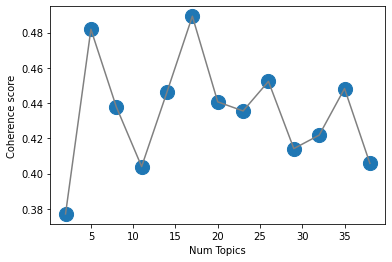

In [41]:
limit=40; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values, "gray")
plt.scatter(x, coherence_values, s=200)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.savefig("/Users/sapir/Documents/non_lemmas_coherence.png", dpi=300)

In [42]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3771
Num Topics = 5  has Coherence Value of 0.4818
Num Topics = 8  has Coherence Value of 0.4379
Num Topics = 11  has Coherence Value of 0.404
Num Topics = 14  has Coherence Value of 0.4463
Num Topics = 17  has Coherence Value of 0.4892
Num Topics = 20  has Coherence Value of 0.4407
Num Topics = 23  has Coherence Value of 0.4355
Num Topics = 26  has Coherence Value of 0.4523
Num Topics = 29  has Coherence Value of 0.4142
Num Topics = 32  has Coherence Value of 0.4218
Num Topics = 35  has Coherence Value of 0.4482
Num Topics = 38  has Coherence Value of 0.4058


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=10)[0][1])
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.019*"ראש" + 0.010*"נתניהו" + 0.010*"יושב" + 0.008*"חבר_הכנסת" + '
  '0.007*"הממשלה" + 0.007*"הכנסת" + 0.006*"מפלגת" + 0.006*"הליכוד" + '
  '0.006*"הבחירות" + 0.005*"כחול_לבן"'),
 (1,
  '0.006*"צהל" + 0.005*"מאות" + 0.004*"הספר" + 0.004*"עשרה" + 0.003*"לאחר" + '
  '0.003*"במהלך" + 0.003*"ראש" + 0.003*"תלמידים" + 0.003*"בשעה" + '
  '0.003*"הפרטים"'),
 (2,
  '0.011*"מאות" + 0.008*"החולים" + 0.007*"בישראל" + 0.006*"מספר" + 0.005*"בני" '
  '+ 0.005*"ראש" + 0.004*"אובחנו" + 0.004*"חולים" + 0.004*"הקורונה" + '
  '0.004*"עשר"'),
 (3,
  '0.004*"המשטרה" + 0.004*"נשים" + 0.003*"שר" + 0.003*"אחוזים" + '
  '0.002*"לראשונה" + 0.002*"עורך" + 0.002*"דינו" + 0.002*"הספר" + '
  '0.002*"התלמידים" + 0.002*"תלמידים"'),
 (4,
  '0.010*"החינוך" + 0.005*"שר" + 0.005*"המורים" + 0.003*"במשדר" + 0.003*"הספר" '
  '+ 0.003*"שלוש" + 0.003*"ראש" + 0.003*"נבלני" + 0.003*"משרד" + '
  '0.003*"הסתדרות"'),
 (5,
  '0.011*"מכבי" + 0.010*"הפועל" + 0.008*"תל_אביב" + 0.006*"אפס" + '
  '0.006*"חדשות" + 0.006*"הספורט" 

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.3812,"טראמפ, המשפט, ראש, לאחר, בני, בתגובה, הישראלים...",תם שימוע ראש הממשלה בינימין נתניהו לאחר עשר שע...
1,1,14.0,0.8430,"לבית_החולים, המשטרה, נפצע, עשרים, בינוני, גבר,...",גבר שלושים נורה ברחוב העלייה בלוד מצבו חובשי מ...
2,2,13.0,0.4607,"ראש, שר, עזה, נגד, עשרה, לאחר, איראן, בתגובה, ...",הרמטכל רב אלוף אביב כוכבי מזהיר הערב נאפשר פגי...
3,3,14.0,0.7574,"לבית_החולים, המשטרה, נפצע, עשרים, בינוני, גבר,...",שר התחבורה בצלאל סמוטריץ הודיע בעמוד הפייסבוק ...
4,4,9.0,0.3972,"ראש, הממשלה, נתניהו, צהל, שר, אמר, לאחר, נגד, ...",נשיא ארצות הברית טראמפ הודיע יציב קווים אדומים...
5,5,1.0,0.5283,"צהל, מאות, הספר, עשרה, לאחר, במהלך, ראש, תלמיד...",שוער הפועל חדרה חביב אוחיון מנותח בשעה לאחר שנ...
6,6,6.0,0.5197,"ראש, נתניהו, הממשלה, הערב, במשרד, החינוך, הממש...",היועץ המשפטי לממשלה מנדלבליט עדכן ראש הממשלה נ...
7,7,0.0,0.5332,"ראש, נתניהו, יושב, חבר_הכנסת, הממשלה, הכנסת, מ...",יושב ראש כחול לבן חבר הכנסת בני גנץ צפוי לנאום...
8,8,11.0,0.5847,"אחוזים, הממשלה, ראש, אלף, שר, החולים, בתוך, הב...",משבר הברקזיט ממשלת בריטניה תגיש בקשה לבחירות כ...
9,9,9.0,0.4245,"ראש, הממשלה, נתניהו, צהל, שר, אמר, לאחר, נגד, ...",עיריית רמת גן הודיעה תחזיר לפעילות קווי האוטוב...


In [53]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9920,"ראש, נתניהו, יושב, חבר_הכנסת, הממשלה, הכנסת, מ...",מתיחות בגוש השינוי חברה ברשימת כחול לבן נפגשה ...
1,1.0,0.9874,"צהל, מאות, הספר, עשרה, לאחר, במהלך, ראש, תלמיד...",ועדת השרים למאבק בקורונה תחדש הדיון בהקלות נוס...
2,2.0,0.9900,"מאות, החולים, בישראל, מספר, בני, ראש, אובחנו, ...",בחצות שבין חמישי לשישי תיכנס לישראל לסגר מהודק...
3,3.0,0.9851,"המשטרה, נשים, שר, אחוזים, לראשונה, עורך, דינו,...",הצו לאכיפת חוק איסור צריכת זנות נחתם בתחילת שמ...
4,4.0,0.9928,"החינוך, שר, המורים, במשדר, הספר, שלוש, ראש, נב...",הגיהאד האיסלמאי מאיים להגיב הרג פעיליו בתקיפת ...
5,5.0,0.9917,"מכבי, הפועל, תל_אביב, אפס, חדשות, הספורט, העל,...",21 מחלוקת בישיבת הממשלה מתווה היציאה מהסגר ראש...
6,6.0,0.9891,"ראש, נתניהו, הממשלה, הערב, במשרד, החינוך, הממש...",שרי הממשלה יאשרו הערב במשאל טלפוני מתווה חדש ל...
7,7.0,0.9917,"ראש, הממשלה, נתניהו, הסגר, אמר, הערב, המדינה, ...",השרים אישרו אחדות ההגבלות הצפויות לחג הפורים ע...
8,8.0,0.9907,"רב, החינוך, הפרופסור, לאחר, לפנות, לברכה, עשרו...",סגר לילי יוטל הארץ ממחר ערב חנוכה למשך שבועיים...
9,9.0,0.9901,"ראש, הממשלה, נתניהו, צהל, שר, אמר, לאחר, נגד, ...",בחירות 2021 בליכוד זועמים השר זאב אלקין מקורב ...


In [54]:
print(sent_topics_sorteddf_mallet.loc[2, "Keywords"])
print(sent_topics_sorteddf_mallet.loc[2, "Text"])

מאות, החולים, בישראל, מספר, בני, ראש, אובחנו, חולים, הקורונה, עשר
בחצות שבין חמישי לשישי תיכנס לישראל לסגר מהודק מערכת החינוך תיסגר ותעבור לפעילות מרחוק ומקומות עבודה שאינם חיוניים ייסגרו שר הבריאות יולי אדלשטיין מבטיח שהפעם האכיפה תופעל כלפי המגזרים בחברה הישראלית ואומר שבימים הקרובים נגיע ליותר מעשרת אלפים חולים חדשים ביממה החולפת אובחנו בישראל משמונת אלפים מאומתים חדשים לקורונה שיעור הבדיקות החיוביות עומד שישה אחוזים ושמונה עשיריות מספר המתחסנים מתקרב לכמעט מיליון וחצי אזרחים אתמול קיבלו מאה וחמישה עשר אלף איש מנת החיסון הראשונה פייזר החלטת הממשלה ההגבלות תהיינה בתוקף למשך שבועיים הפרופסור אלי וקסמן ראש הצוות המייעץ למלל אומר לומר שנצטרך להאריך הסגר


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df_dominant_topic[(df_dominant_topic.Dominant_Topic == 2.0) & (df_dominant_topic.Topic_Perc_Contrib > 0.98)].Text.to_list()

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['מספר חולי הקורונה הפעילים ירד לשלושת אלפים ארבע מאות ושלושה נתונים שמפרסם הערב משרד הבריאות ביממה האחרונה אובחנו בישראל תשעה חולי קורונה מניין המתים עלה בארבעה למאתיים שבעים ושניים ומספר החולים המונשמים הוסיף לרדת ועומד כעת ארבעים וארבעה בריאות מאיר מרציאנו מוסיף כה החלימו מקורונה בישראל קרוב לשלושה עשר אלף נדבקים',
 'מספר חולי הקורונה הפעילים בישראל ירד מחמשת אלפים נתונים שמפרסם הערב משרד הבריאות ביממה האחרונה אובחנו חמישים וחמישה חולי קורונה והחלימו מהמחלה שלוש מאות חמישים ושישה נדבקים מניין המתים עלה בחמישה ועומד כעת מאתיים ארבעים וחמישה בני ליה ספילקין מציינת מספר החולים שמצבם מוסיף לרדת ועומד שבעים ושמונה חולים מהם שישים ושלושה מונשמים',
 'נדע סיכויינו לחלות בקורונה סוג הדם קבוצת חוקרים מאירופה פיתחה בדיקת דם חדשנית שתנסה למאבק בנגיף שוחחנו מהם הפרופסור מרקוס ראסלר Markus Ralser חולי קורונה רבים מגיעים לבתי החולים והם מרגישים ייתכן שהמחלה חמורה ממה שנראה לעין ואז המצב מתדרדר במהירות המידע מבדיקת הדם לרופאים להחליט בצורה הביוכימאי ראלסר בראיון לכתבת חדשות החוץ רומי פרידמן',
 'הסג

In [57]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.138040 -0.148454       1        1  10.951312
1     -0.047711  0.027311       2        1   4.457387
2      0.015231  0.127710       3        1   5.050682
3     -0.116212 -0.045045       4        1   2.449520
4     -0.070211  0.021421       5        1   2.822795
5     -0.124261  0.087013       6        1   4.685390
6      0.098680  0.011870       7        1   8.146784
7      0.057259 -0.002412       8        1   5.104678
8     -0.101017  0.060741       9        1   2.926143
9      0.073339 -0.075317      10        1   9.755889
10     0.071982  0.057067      11        1   4.679402
11     0.089875  0.104117      12        1   7.734225
12    -0.008080 -0.025908      13        1   3.462211
13     0.046834 -0.077210      14        1   7.712077
14    -0.106629 -0.112950      15        1  11.264776
15    -0.079250 -0.113695      16        1   3.308824
16     0.062132  0.103741      17        1   5.487905, topic_info=             Term        Freq       Total Category  logprob  loglift
612   לבית_החולים  201.000000  201.000000  Default  30.0000  30.0000
561          מכבי  120.000000  120.000000  Default  29.0000  29.0000
36         נתניהו  850.000000  850.000000  Default  28.0000  28.0000
203         הפועל  111.000000  111.000000  Default  27.0000  27.0000
228          מאות  450.000000  450.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
69            אמר   25.425591  543.771245  Topic17  -6.0653  -0.1601
683           נגד   23.244117  395.324153  Topic17  -6.1550   0.0690
71         בישראל   22.150658  350.379047  Topic17  -6.2032   0.1415
1774           פי   21.771268  298.655862  Topic17  -6.2205   0.2839
256          יושב   21.091688  414.214756  Topic17  -6.2522  -0.0749

[1316 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
34013     17  0.914123  anabtawi
2672       1  0.087560       אבו
2672       2  0.131340       אבו
2672      10  0.131340       אבו
2672      14  0.510767       אבו
...      ...       ...       ...
4616       9  0.508048     תקיפה
4616      10  0.127012     תקיפה
4616      14  0.063506     תקיפה
4616      16  0.127012     תקיפה
4810      12  0.927547      תרזה

[3807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [58]:
p = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics=False)
# pyLDAvis.save_html(p, 'lda.html')

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
